In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
rideshare_filepath = 'filepath/aggregated_fhvhv_tripdata_2024-06.csv'
df = pd.read_csv(rideshare_filepath)

In [3]:
df.describe()

,pickup_hour,is_weekend,ride_count,Temperature (F),Wind Speed (mph),Precip. (in),Condition_All_Cloudy,Condition_All_Fair,Condition_All_Fog,Condition_All_Rain,Condition_All_Storm
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,11.500000,0.333333,27948.925000,75.488889,10.004167,0.001944,0.748611,0.211111,0.006944,0.030556,0.002778
std,6.926999,0.471732,10515.039051,6.920763,5.058900,0.016564,0.434113,0.408381,0.083101,0.172230,0.052668
min,0.000000,0.000000,4597.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.000000,20544.000000,70.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.500000,0.000000,30206.000000,75.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,17.250000,1.000000,35015.250000,80.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,1.000000,57982.000000,101.000000,39.000000,0.200000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'], format='%m/%d/%Y', errors='coerce')

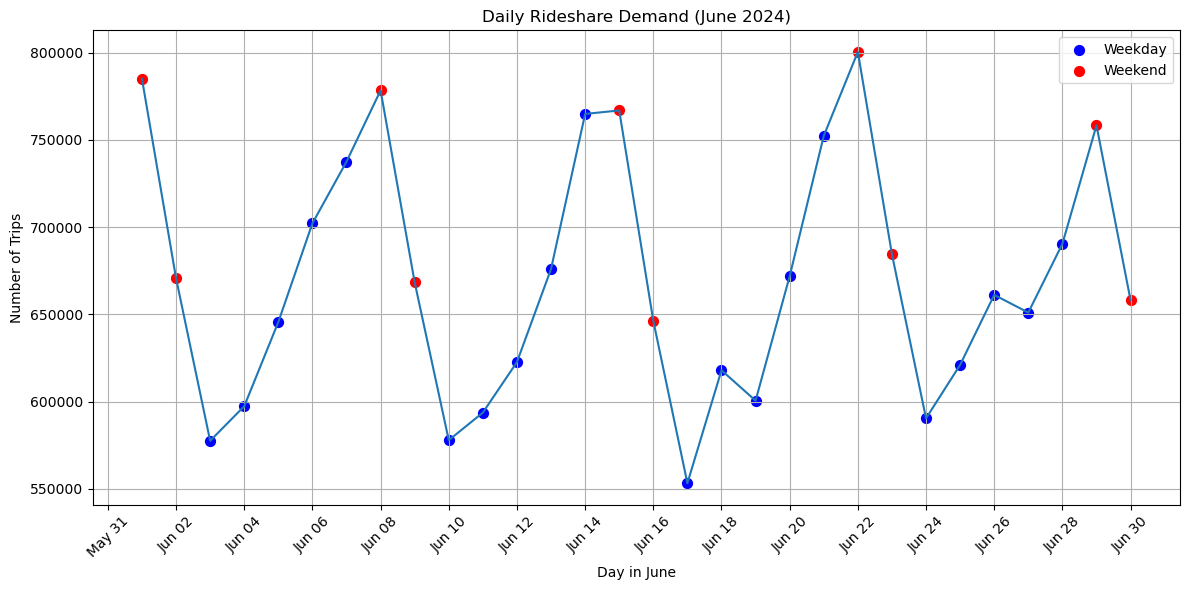

In [31]:
# Group by date to get the total ride count per day and merge with 'is_weekend'
daily_trend = df.groupby(['pickup_date', 'is_weekend'])['ride_count'].sum().reset_index()

# Rename columns for clarity
daily_trend.columns = ['Date', 'Is_Weekend', 'Total Rides']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_trend['Date'], daily_trend['Total Rides'], linestyle='-', marker='')

# Plot different colored dots for weekdays and weekends
plt.scatter(daily_trend[daily_trend['Is_Weekend'] == 0]['Date'], 
            daily_trend[daily_trend['Is_Weekend'] == 0]['Total Rides'], 
            color='blue', label='Weekday', s=50)

plt.scatter(daily_trend[daily_trend['Is_Weekend'] == 1]['Date'], 
            daily_trend[daily_trend['Is_Weekend'] == 1]['Total Rides'], 
            color='red', label='Weekend', s=50)

# Improve x-axis formatting
plt.title('Daily Rideshare Demand (June 2024)')
plt.xlabel('Day in June')
plt.ylabel('Number of Trips')
plt.grid(True)

# Format the x-axis to show date labels more clearly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Show every 2nd day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as 'Month Day'
plt.xticks(rotation=45)  # Rotate date labels to avoid overlap
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of title/labels
plt.show()

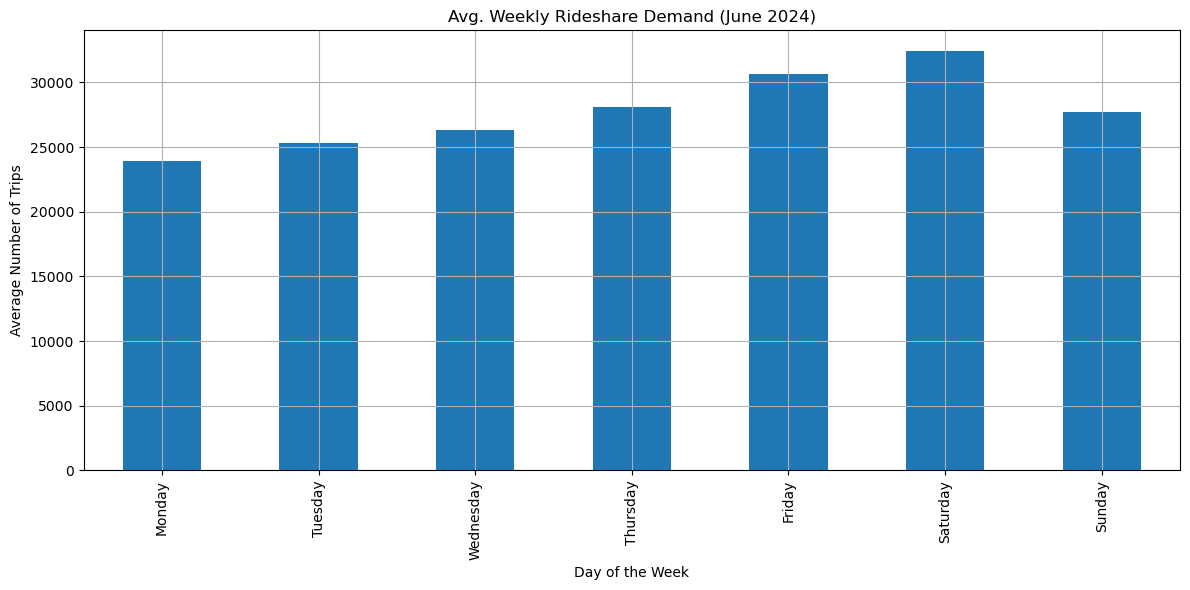

In [28]:
weekly_trend = df.groupby(df['pickup_date'].dt.day_name())['ride_count'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(12, 6))
weekly_trend.plot(kind='bar')
plt.title('Avg. Weekly Rideshare Demand (June 2024)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

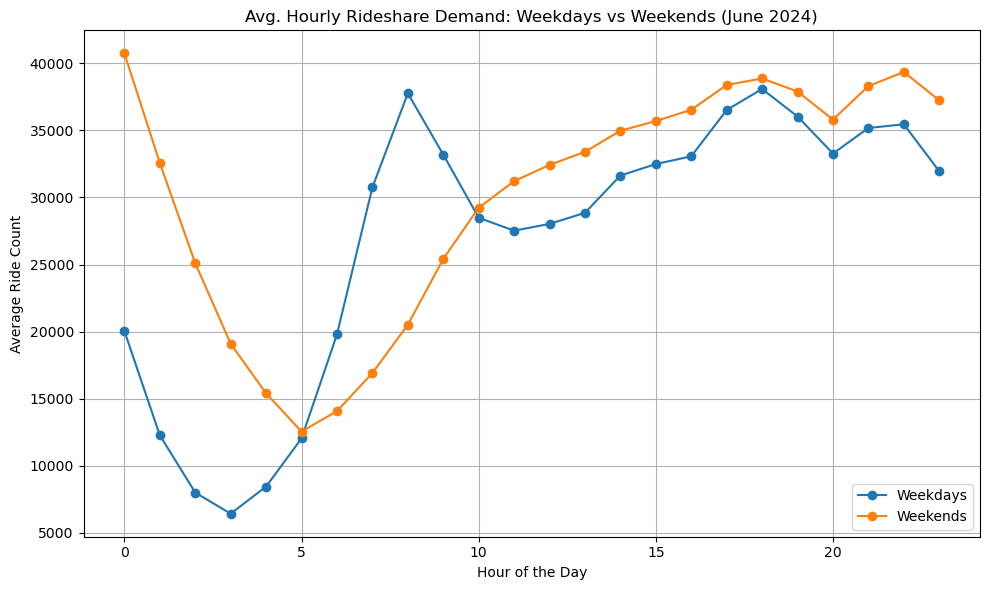

In [34]:
hourly_trends = df.groupby(['pickup_hour', 'is_weekend'])['ride_count'].mean().reset_index()

weekdays = hourly_trends[hourly_trends['is_weekend'] == 0]
weekends = hourly_trends[hourly_trends['is_weekend'] == 1]

plt.figure(figsize=(10, 6))
plt.plot(weekdays['pickup_hour'], weekdays['ride_count'], marker='o', linestyle='-', label='Weekdays')
plt.plot(weekends['pickup_hour'], weekends['ride_count'], marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Ride Count')
plt.title('Avg. Hourly Rideshare Demand: Weekdays vs Weekends (June 2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
df['day_of_week'] = df['pickup_date'].dt.weekday  # Extract the day number
df.drop('is_weekend', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup_date           720 non-null    datetime64[ns]
 1   pickup_hour           720 non-null    int64         
 2   ride_count            720 non-null    int64         
 3   Temperature (F)       720 non-null    int64         
 4   Wind Speed (mph)      720 non-null    int64         
 5   Precip. (in)          720 non-null    float64       
 6   Condition_All_Cloudy  720 non-null    int64         
 7   Condition_All_Fair    720 non-null    int64         
 8   Condition_All_Fog     720 non-null    int64         
 9   Condition_All_Rain    720 non-null    int64         
 10  Condition_All_Storm   720 non-null    int64         
 11  day_of_week           720 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 67.6 KB


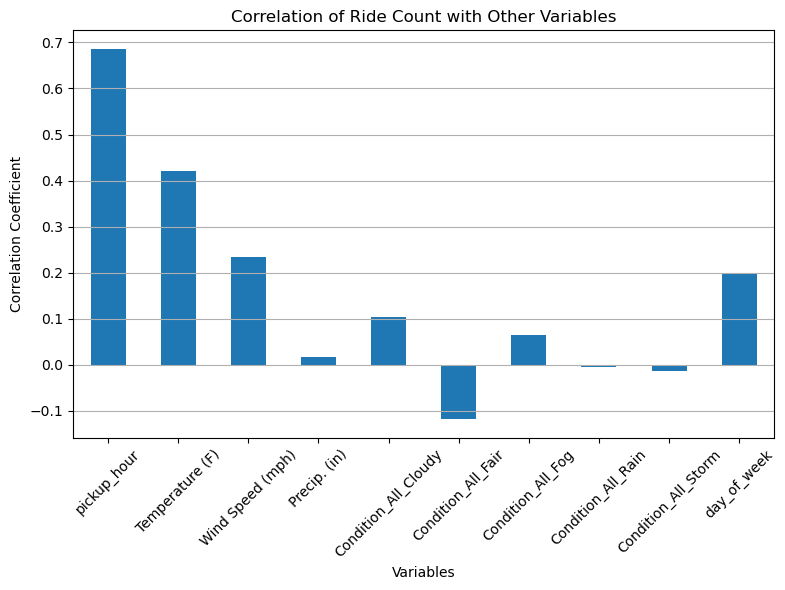

In [46]:
correlation_with_ride_count = df.corr(numeric_only=True)['ride_count'].drop('ride_count')

# Plotting the correlation with ride_count
plt.figure(figsize=(8, 6))
correlation_with_ride_count.plot(kind='bar')
plt.title('Correlation of Ride Count with Other Variables')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y')
plt.tight_layout()
plt.show()